### Loading the dataset

In [14]:
import pandas as pd
import numpy as np

In [15]:
file = "Co_600K_Jul2019_6M.pkl"
data = pd.read_pickle(file)

In [16]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

In [17]:
data.head()

,AccountsAccountCategory,AccountsAccountRefDay,AccountsAccountRefMonth,CompanyCategory,CompanyId,CompanyName,CompanyNameCountNum,CompanyNameCountX,CompanyNameLen,CompanyNameWordLen,CompanyNumber,CompanyStatus,Field1014,Field1129,Field1522,Field1631,Field17,Field1865,Field1871,Field1885,Field1977,Field2267,Field2298,Field2304,Field2316,Field2447,Field2483,Field2497,Field2502,Field2506,Field2616,Field2619,Field2705,Field2815,Field2816,Field282,Field2823,Field306,Field448,Field465,Field474,Field477,Field487,Field489,Field541,Field69,Field70,Field972,FilingId,Filled,LimitedPartnershipsNumGenPartners,LimitedPartnershipsNumLimPartners,MortgagesNumMortCharges,MortgagesNumMortOutstanding,MortgagesNumMortPartSatisfied,MortgagesNumMortSatisfied,PreviousName_1CompanyName,RegAddressAddressLine1,RegAddressAddressLine2,RegAddressCareOf,RegAddressCountry,RegAddressCounty,RegAddressPOBox,RegAddressPostCode,RegAddressPostTown,SIC1,SIC2,SIC3,Status20190701,country,cty,dAccountsLastMadeUpDate,dAccountsNextDueDate,dConfStmtLastMadeUpDate,dConfStmtNextDueDate,dContextInstant,dIncorporationDate,dPreviousName_1CONDATE,dPreviousName_2CONDATE,dReturnsLastMadeUpDate,dReturnsNextDueDate,eAccountsAccountCategory,eCompanyCategory,hasF1014,hasF1129,hasF1522,hasF1631,hasF17,hasF1865,hasF1871,hasF1885,hasF1977,hasF2298,hasF2304,hasF2316,hasF2447,hasF2483,hasF2497,hasF2502,hasF2506,hasF2616,hasF2619,hasF2705,hasF2815,hasF282,hasF306,hasF448,hasF465,hasF474,hasF487,hasF489,hasF541,hasF69,hasF70,hasGNotice,imd,imdu,isfailed,lat,long,nSIC,namechanged,namechanged2,oa11,oac1,oac11,oac2,oseast1m,osnrth1m,pcd,ru11ind
2993,TOTAL EXEMPTION FULL,31,3,Private Limited Company,352482,ATLANTIC BAY HOTEL (WOOLACOMBE) LIMITED,0,0,39,5,10496720,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,0,0,2,2,0,0,None,D2 RIORGES LINK LOWFIELDS BUSINESS PARK,None,None,UNITED KINGDOM,None,None,HX5 9DG,ELLAND,68.0,1.0,0.0,Active,E,E99999999,2018.246575,2020.000000,2018.898630,2019.936986,NaN,2016.901639,NaN,NaN,NaN,2017.978082,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11766.0,11398.615445,1,53.689782,-1.830213,68100.0,0,0,E00054910,5,5A1,5A,411310.0,421493.0,HX59DG,A1
3969,DORMANT,30,11,Private Limited Company,3477508,SUPERIOR PROPERTY INVESTMENTS LTD,0,0,33,4,10500407,Active,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,10500407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,10540139.0,None,0,0,2,2,0,0,None,THE OLD POST OFFICE,41-43 MARKET PLACE,None,ENGLAND,WILTSHIRE,None,SN15 3HR,CHIPPENHAM,68.0,1.0,0.0,Active,E,E99999999,2017.915068,2019.665753,2018.906849,2019.945205,2017.915068,2016.909836,NaN,NaN,NaN,2017.986301,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,8305.0,8045.682583,1,51.458190,-2.113613,68100.0,0,0,E00166435,2,2C1,2C,392203.0,173252.0,SN153HR,C1
6752,TOTAL EXEMPTION FULL,30,11,Private Limited Company,1509998,GLP OLD STREET LIMITED,0,0,22,4,10502424,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,0,0,0,0,0,0,None,THE LOFT,34-35 EASTCASTLE STREET,None,ENGLAND,None,None,W1W 8DW,LONDON,56.0,1.0,1.0,Active,E,E99999999,2017.904110,2019.665753,2018.909589,2019.947945,NaN,2016.912568,NaN,NaN,NaN,2017.989041,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,12463.0,12073.852141,1,51.516625,-0.139064,56101.0,0,0,E00024130,2,2B2,2B,529221.0,181386.0,W1W8DW,A1
15331,TOTAL EXEMPTION FULL,31,12,Private Limited Company,410035,BAMFORD BROOK APARTMENTS LTD,0,0,28,4,10520325,Active,294274.0,NaN,NaN,NaN,NaN,294272.0,NaN,937073.0,NaN,None,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437073.0,NaN,None,NaN,10520325,7381.0,NaN,1731345.0,NaN,NaN,NaN,943745.0,747000.0,NaN,NaN,None,10783178.0,None,0,0,2,2,0,0,None,109-111 BLACKBURN STRE

In [18]:
data.isnull().sum()

AccountsAccountCategory       0
AccountsAccountRefDay         4
AccountsAccountRefMonth       4
CompanyCategory               0
CompanyId                     0
                           ... 
oac2                          0
oseast1m                      0
osnrth1m                      0
pcd                           0
ru11ind                    8708
Length: 131, dtype: int64

In [19]:
data.describe()

,CompanyId,CompanyNameCountNum,CompanyNameCountX,CompanyNameLen,CompanyNameWordLen,Field1014,Field1129,Field1522,Field1631,Field17,Field1865,Field1871,Field1885,Field1977,Field2298,Field2304,Field2316,Field2447,Field2483,Field2497,Field2502,Field2506,Field2616,Field2619,Field2705,Field2815,Field282,Field306,Field448,Field465,Field474,Field477,Field487,Field489,Field541,Field69,Field70,FilingId,MortgagesNumMortCharges,MortgagesNumMortOutstanding,MortgagesNumMortPartSatisfied,MortgagesNumMortSatisfied,SIC1,SIC2,SIC3,dAccountsLastMadeUpDate,dAccountsNextDueDate,dConfStmtLastMadeUpDate,dConfStmtNextDueDate,dContextInstant,dIncorporationDate,dPreviousName_1CONDATE,dPreviousName_2CONDATE,dReturnsLastMadeUpDate,dReturnsNextDueDate,eAccountsAccountCategory,eCompanyCategory,hasF1014,hasF1129,hasF1522,hasF1631,hasF17,hasF1865,hasF1871,hasF1885,hasF1977,hasF2298,hasF2304,hasF2316,hasF2447,hasF2483,hasF2497,hasF2502,hasF2506,hasF2616,hasF2619,hasF2705,hasF2815,hasF282,hasF306,hasF448,hasF465,hasF474,hasF487,hasF489,hasF541,hasF69,hasF70,imd,imdu,isfailed,lat,long,nSIC,namechanged,namechanged2,oseast1m,osnrth1m
count,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,3.592270e+05,1.611720e+05,1.493000e+03,1.325000e+04,2.758000e+03,2.843770e+05,2.750000e+04,3.225010e+05,3.673000e+03,8.269000e+03,3.080000e+02,1.120930e+05,7.250000e+02,7.040000e+02,1.527800e+04,2.840900e+04,8.080000e+02,5.791000e+03,4.644000e+03,3.038550e+05,2.020000e+02,6.500000e+02,1.666980e+05,2.716000e+03,2.944520e+05,1.452600e+04,1.840000e+02,3.111000e+03,2.942740e+05,1.342170e+05,6.106000e+03,4.290000e+03,3.913200e+05,600000.000000,600000.000000,600000.000000,600000.000000,599845.000000,599845.000000,599845.000000,448826.000000,599996.000000,494281.000000,599818.000000,391320.000000,600000.000000,64884.000000,11566.000000,327094.000000,599911.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,599845.000000,600000.000000,600000.000000,600000.000000,6.000000e+05
mean,2.994577e+06,0.091757,0.044125,23.890753,3.505062,1.157784e+06,2.017063e+05,1.443119e+05,6.602893e+05,8.641642e+03,1.414758e+06,1.442164e+05,1.301836e+05,2.083686e+05,2.909950e+05,2.151945e+05,1.601904e+05,4.578348e+05,5.413635e+05,5.512945e+06,1.574312e+05,5.214762e+05,3.411226e+05,4.836578e+05,2.263626e+05,1.876956e+06,6.824880e+04,1.070527e+05,3.054508e+06,1.788580e+05,2.160802e+05,2.126780e+05,3.638260e+05,1.955745e+05,1.873247e+05,3.066837e+04,2.926583e+04,1.105748e+07,0.646423,0.364123,0.000428,0.281442,64.188165,3.419232,35.155068,2018.362649,2020.200901,2018.978470,2020.010991,2018.254533,2011.235968,2012.461869,2009.928053,2015.994944,2017.922438,9.698625,0.001437,0.598712,0.268620,0.002488,0.022083,0.004597,0.473962,0.045833,0.537502,0.006122,0.013782,0.000513,0.186822,0.001208,0.001173,0.025463,0.047348,0.001347,0.009652,0.007740,0.506425,0.000337,0.001083,0.277830,0.004527,0.490753,0.024210,0.005185,0.490457,0.223695,0.010177,0.007150,15085.559318,14618.728927,0.001993,52.351373,-1.236810,64565.243508,0.108140,0.019277,456447.457688,2.715670e+05
std,1.799176e+06,0.490270,0.211088,8.115979,1.060011,5.509010e+08,1.625025e+06,1.366620e+06,6.373547e+06,6.635095e+04,6.191677e+08,6.132759e+06,1.961956e+06,7.540217e+05,2.336038e+06,1.003965e+06,1.035884e+06,2.622104e+06,1.663745e+06,5.188778e+08,6.052075e+06,2.452661e+06,2.377175e+06,3.059701e+06,2.444586e+06,5.941802e+06,3.726858e+05,5.633624e+06,1.359413e+07,1.073894e+06,2.195209e+06,3.937399e+05,8.707091e+06,2.025292e+06,1.710672e+06,1.031095e+05,7.982076

SIC forst two digits

In [20]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 2993 to 3145186
Data columns (total 131 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    AccountsAccountCategory            object 
 1    AccountsAccountRefDay              object 
 2    AccountsAccountRefMonth            object 
 3    CompanyCategory                    object 
 4    CompanyId                          int64  
 5    CompanyName                        object 
 6    CompanyNameCountNum                int64  
 7    CompanyNameCountX                  int64  
 8    CompanyNameLen                     int64  
 9    CompanyNameWordLen                 int64  
 10   CompanyNumber                      object 
 11   CompanyStatus                      object 
 12   Field1014                          float64
 13   Field1129                          float64
 14   Field1522                          float64
 15   Field1631                          float64
 1

In [38]:
data.Field2267

2993       None
3969       None
6752       None
15331      None
18593      None
           ... 
3195120    None
929546     None
2794558    None
1475053    None
3145186    None
Name: Field2267, Length: 600000, dtype: object

In [40]:
num_data = data.select_dtypes(include=np.number)

In [42]:
X_df = num_data.loc[:, num_data.columns!='isfailed']

In [44]:
y_df = num_data.loc[:,'isfailed']

In [54]:
y_df.sum()

1196

### Creating datasets and dataloaders

In [24]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

NameError: name 'X_df' is not defined

In [ ]:
X_train_df

In [83]:
X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

In [25]:
import torch

In [26]:
X_train = torch.tensor(pd.read_csv('X_train.csv', index_col = False).values)
X_test = torch.tensor(pd.read_csv('X_test.csv', index_col = False).values)
y_train = torch.tensor(pd.read_csv('y_train.csv', index_col = False).values)
y_test = torch.tensor(pd.read_csv('y_test.csv', index_col = False).values)

In [27]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [28]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [29]:
train = MyDataset(X_train, y_train)
test = MyDataset(X_test, y_test)

In [30]:
train_loader = DataLoader(dataset=train, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=100, shuffle=True)

### Making the network

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.norm1 = nn.BatchNorm1d(97)
        self.layer1 = nn.Linear(97, 30)
        self.norm2 = nn.BatchNorm1d(30)
        self.layer2 = nn.Linear(30, 10)
        self.norm3 = nn.BatchNorm1d(10)
        self.output = nn.Linear(10,1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = torch.nan_to_num(x)
        y = self.norm1(x)
        y = self.layer1(y)
        y = self.norm2(y)
        y = self.relu(y)
        y = self.layer2(y)
        y = self.norm3(y)
        y = self.relu(y)
        y = self.output(y)
        return y

### Training the network

In [33]:
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

In [34]:
model = MyNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss()
train_loss = []

In [35]:
def train_fn(loader, model, optimizer, loss_fn):
    for batch in tqdm(loader):
        inputs = batch[0]
        targets = batch[1]
        optimizer.zero_grad()
        predictions = model(inputs.float())
        loss = loss_fn(predictions, targets.float())

        loss.backward()
        optimizer.step()

        train_loss.append(float(loss.item()))

In [36]:
train_fn(train_loader, model, optimizer, loss_fn)

100%|██████████| 4800/4800 [00:32<00:00, 149.12it/s]


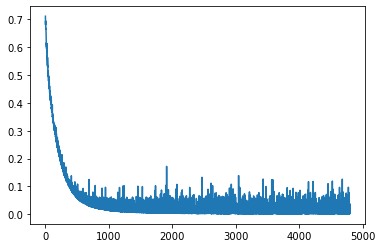

In [37]:
plt.plot(train_loss)
plt.show()